In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN

In [2]:
data1=pd.read_excel('EastWestAirlines.xlsx',sheet_name = 'data')
data1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
data=data1.drop('ID#',axis=1)

In [4]:
data.shape

(3999, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [6]:
data.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [7]:
data.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [8]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [9]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [10]:
df_norm = norm_func(data.iloc[:,1:])

In [11]:
df_norm

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...
3994,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [12]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state = 12)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)

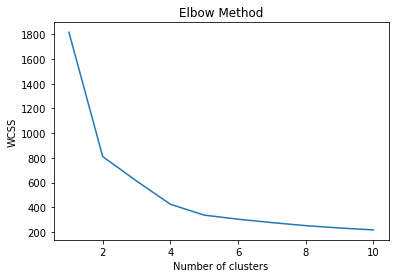

In [13]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
cluster_new =KMeans(n_clusters=4,random_state=12)
cluster_new.fit(df_norm)

KMeans(n_clusters=4, random_state=12)

In [15]:
cluster_new.labels_

array([2, 2, 2, ..., 3, 2, 2])

In [16]:
data['clusterid_new'] = cluster_new.labels_

In [17]:
data.groupby('clusterid_new').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusterid_new,,,,,,,,,,,
0,118032.061192,73.112721,3.576490,1.001610,1.022544,31282.666667,17.251208,225.352657,0.632850,4436.307568,0.0
1,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
2,40747.617290,92.345809,1.092778,1.017923,1.004217,3335.152873,6.488666,226.599895,0.658935,3619.111755,0.0
3,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0


In [18]:
data.sort_values('clusterid_new')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
2880,25853,0,3,1,1,23163,18,0,0,1886,0,0
1724,51745,0,4,1,1,41377,14,0,0,4606,0,0
3601,74093,0,3,1,1,20055,37,0,0,949,0,0
2010,87553,0,3,1,1,15681,14,0,0,4547,0,0
1153,48775,0,3,1,1,17494,15,0,0,5588,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
969,20702,0,4,1,1,30451,24,1100,5,5856,1,3
966,2843,0,4,1,1,44130,35,7450,20,5869,1,3
964,26367,0,3,1,1,19649,15,0,0,5874,1,3
984,238641,0,5,1,1,61971,15,850,2,5849,1,3


In [19]:
data_1 = data.drop('clusterid_new',axis=1)

In [20]:
data_1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


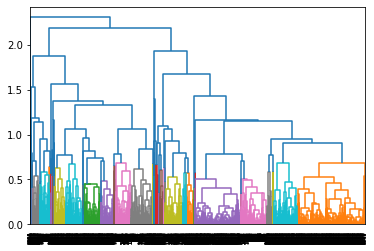

In [21]:
dendrogram = sch.dendrogram(sch.linkage(df_norm,method ='complete'),color_threshold=.7)

In [22]:
hc =AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage ='complete')

In [23]:
y_hc = hc.fit_predict(df_norm)
clusters =pd.DataFrame(y_hc,columns=['clusters'])

In [24]:
clusters

,clusters
0,2
1,2
2,2
3,2
4,0
...,...
3994,0
3995,0
3996,0
3997,2


In [25]:
data_1['hc_clusterid'] =clusters

In [26]:
data_1.sort_values('hc_clusterid')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hc_clusterid
1999,327126,1452,5,1,1,97997,25,350,3,4440,1,0
3167,17863,0,1,1,1,0,0,0,0,2028,1,0
1513,124775,1704,1,1,1,11564,8,700,2,4847,1,0
1512,4779,0,1,1,1,600,2,0,0,4926,1,0
3168,28443,0,4,1,1,53065,18,150,1,2462,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1756,63036,0,2,1,1,9006,14,0,0,4475,0,2
3594,27619,0,4,1,1,83726,68,14050,46,1325,1,3
3583,160114,500,1,1,1,71954,86,30817,53,1373,1,3
2015,53232,888,4,1,1,80696,65,22100,45,3831,1,3


In [27]:
data_2 =data_1.drop('hc_clusterid',axis =1)

In [28]:
dbscan = DBSCAN(eps=.3,min_samples=33)
dbscan.fit(df_norm)

DBSCAN(eps=0.3, min_samples=33)

In [29]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [30]:
data_2['DB_clusterid']=dbscan.labels_

In [31]:
data_2.sort_values('DB_clusterid')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,DB_clusterid
2006,101901,0,1,2,1,17898,22,100,1,4433,0,-1
702,340874,0,5,1,1,68090,43,5676,27,6305,1,-1
198,8669,0,1,3,1,11397,16,0,0,7486,1,-1
3155,21736,0,1,2,1,6672,10,0,0,2544,0,-1
2674,59704,0,4,2,1,57404,14,0,0,2440,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
2607,7041,0,1,1,1,1747,12,0,0,2718,1,1
1078,2558,0,1,1,1,6264,10,0,0,5581,1,1
2604,135408,0,5,1,1,62224,15,607,1,2697,1,1
2621,235422,0,2,1,1,30208,14,0,0,2629,1,1
